In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

###  Inversmetoden plottar

In [7]:
def F(x):
    return 1 - np.exp(-x)

def FINV(y):
    return -np.log(1 - y)

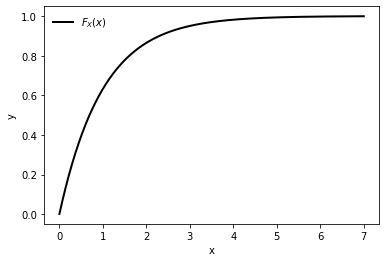

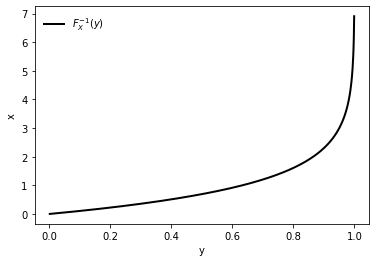

In [9]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0.001, 7, 1000)
ax.plot(x, F(x), 'k-', lw=2, label='$F_X(x)$')
plt.xlabel('x')
plt.ylabel('y')

ax.legend(loc='best', frameon=False)
# plt.savefig("CDF_plot.pdf", bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 1)
x = np.linspace(0.001, 0.999, 1000)
ax.plot(x, FINV(x), 'k-', lw=2, label='$F_X^{-1}(y)$')
plt.xlabel('y')
plt.ylabel('x')

ax.legend(loc='best', frameon=False)
# plt.savefig("inv_CDF_plot.pdf", bbox_inches='tight')
plt.show()

### Exempel 1.1

Generera ett stickprov av storlek 3 från U(0,1):

In [25]:
u_stickprov = stats.uniform.rvs(size = 3)

In [26]:
u_stickprov

array([0.60437479, 0.26291243, 0.76277041])

Definiera en funktion som är fördelningsfunktionens invärs:

In [27]:
def Finv(u):
    return -(1/2)*np.log(u)

Applicera invärsfördelningsfunktion till stickprov från $U(0,1)$ för att få ett stickprov av samma storlek från $\textrm{Exp}(2)$:

In [28]:
stickprov = [Finv(u) for u in u_stickprov]
print(stickprov)

[0.25178037927929703, 0.6679671378146657, 0.135399099598635]


Vi kan ta mer utfall och plotta resultande stickprov från $\textrm{Exp(2)}$ tillsammans med täthetsfunktionen:

In [7]:
stickprov_100 = [Finv(u) for u in stats.uniform.rvs(size = 100)]

In [9]:
def pdf(x):
    return 2*np.exp(-2*x)

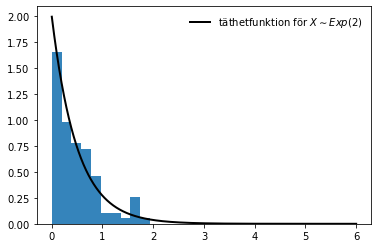

In [22]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0.001, 6, 1000)
ax.plot(x, pdf(x), 'k-', lw=2, label='täthetfunktion för $X\sim{Exp}(2)$')

ax.hist(stickprov_100, density=True, histtype='stepfilled', alpha=0.9)
ax.legend(loc='best', frameon=False)
plt.show()

### Box-Muller

Vi ska generera ett stickprov av storlek $100$ från simultan fördelningen $(X_1,X_2)$ där

$$
\begin{split}
X_1 &= N_1,\\
X_2 &= 2X_1 + N_2
\end{split}
$$

och $N_1$ och $N_2$ är oberoende och $N(0,1)$-fördelade. Vi gör det genom att generera ett stickprov från $N_1 = X_1$ med hjälp av Box-Mueller metoden. Sedan för varje utfall $x_i$ i stickprovet genererar vi ett utfall $n_i$ från $N_2$ (med hjälp av Box-Mueller metoden igen) och beräknar ett utfall från $f_{X_2 | X_1}(x_2 | x_1)$ genom formeln $x_2 = 2x_1 + n_1$.

Först definierar vi en funktion för Box-Mueller metoden:

In [29]:
def Box_Mueller(n):
    u1 = stats.uniform.rvs(size = n)
    u2 = stats.uniform.rvs(size = n)
    x_samps = np.array([(-2*np.log(u1[i]))**(1/2)*np.cos(2*np.pi*u2[i]) for i in range(n)])
    return x_samps

Vi genererar $100$ utfall från $X_1 = N_1$ med hjälp av Box-Mueller:

In [46]:
x1_samps = Box_Mueller(500)

Om vi plottar histogrammet av stickprovet ser vi att det ser $N(0,1)$-fördelade ut. 

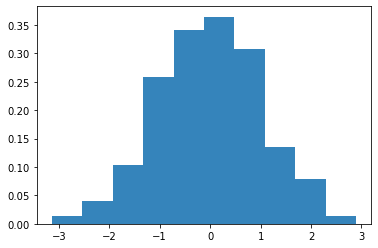

In [48]:
plt.hist(x1_samps, density=True, histtype='stepfilled', alpha=0.9)
plt.show()

Nu definierar vi en funktion som genererar ett stickprov av storlek $n$ från fördelningen $(X_1,X_2)$ där

$$
\begin{split}
X_1 &= N_1,\\
X_2 &= \lambda X_1 + N_2
\end{split}
$$

In [63]:
def sampler(n, λ):
    x1 = Box_Mueller(n)
    n2 = Box_Mueller(n)
    joint_samps = [[x1[i], λ*x1[i] + n2[i]] for i in range(n)]
    return np.array(joint_samps)

När vi tar $\lambda = 2$ får vi önskat stickprov:

In [64]:
samples = sampler(500, 2)

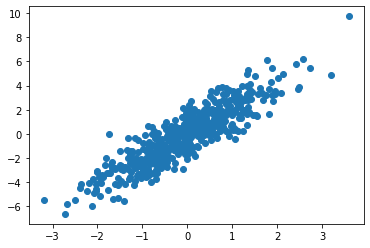

In [73]:
plt.scatter(samples[:,0], samples[:,1])
# plt.savefig("pos_correlated.pdf", bbox_inches='tight')
plt.show()

Här ser ut ett stickprov från fördelningen när $\lambda = -3$:

In [66]:
samples2 = sampler(500, -3)

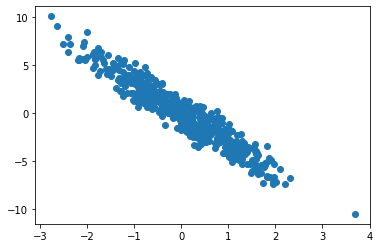

In [74]:
plt.scatter(samples2[:,0], samples2[:,1])
# plt.savefig("neg_correlated.pdf", bbox_inches='tight')
plt.show()

När vi tar $\lambda = 0$ har vi att $(X_1, X_2) = (N_1, N_2)$ där $N_1$ och $N_2$ är oberoende.  Ett stickprov av storlek $500$ från denna population ser ut som följande:

In [68]:
samples3 = sampler(500, 0)

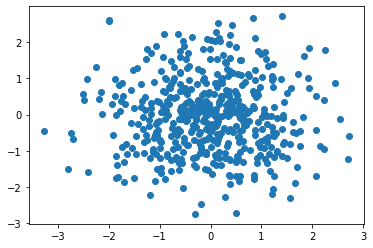

In [75]:
plt.scatter(samples3[:,0], samples3[:,1])
# plt.savefig("uncorrelated.pdf", bbox_inches='tight')
plt.show()

Plottarna visar att $\lambda$ kontrollerar korrelationen mellan $X_1$ och $X_2$ vilken är ett mått av beroende. Vi ser från formeln $X_2 = \lambda X_1 + N_1$ att $X_2$ är en linjär function av $X_1$ med riktningskoefficient $\lambda$.  När data följer en linje med en positiv riktningskoefficient säger vi att $X_1$ och $X_2$ är postivit korrelerade och när den är negative säger vi att de är negativt korrelerade.  När koefficienten är lika med $0$ säger vi att de är okorrelerade.

### Negativ Binomialfördelning

In [95]:
def negBinCDF(r, p, x):
    return sum([scipy.special.binom(r + j - 1, j)*p**r*(1-p)**j for j in range(x+1)])

In [91]:
x = 2
for j in range(x+1):
    print(j)

0
1
2


In [98]:
negBinCDF(3, 1/2, 1)

0.3125

In [101]:
for x in [-1, 0, 1, 2, 3, 4, 5, 6, 7]:
    print(negBinCDF(3, 1/2, x))

0
0.125
0.3125
0.5
0.65625
0.7734375
0.85546875
0.91015625
0.9453125


In [103]:
stats.uniform.rvs(size = 2)

array([0.27204295, 0.35875192])

Plotta ett histogram och täthetsfunktion:

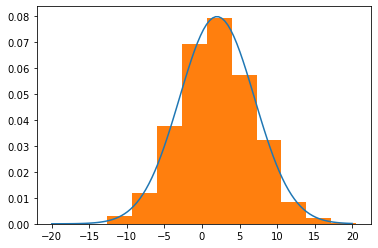

In [6]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-20, 20, 100)

ax.plot(x, stats.norm.pdf(x, loc=2, scale=5))
ax.hist(stats.norm.rvs(size = 1000, loc=2, scale=5), density=True)

# plt.savefig("sim_ex.pdf", bbox_inches='tight')
plt.show()

### Exempel krökt exponentialfamilj:

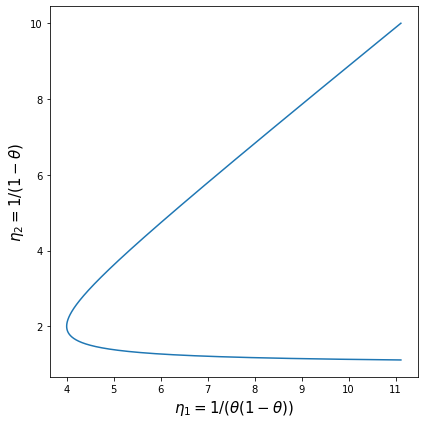

In [14]:
plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.autolayout"] = True

N = 1000
t = np.linspace(0.1, 0.9, N)
p = t
x, y = 1/(p*(1-p)), 1/(1-p)
fig, ax = plt.subplots()
ax.plot(x, y)

plt.xlabel('$η_1 = 1/(θ(1-θ))$', fontsize=15)
plt.ylabel('$η_2 = 1/(1-θ)$', fontsize=15)

# plt.savefig("curved_exp_fam.pdf", bbox_inches='tight')

plt.show()


### Exempel 2.9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

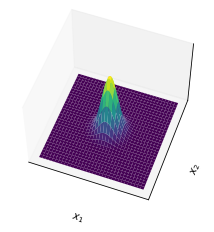

In [16]:
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0,0])
Sigma = np.array([[ 1 , 0], [0,  1]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

# plt.savefig("untransformed_gaussian.pdf", bbox_inches='tight')

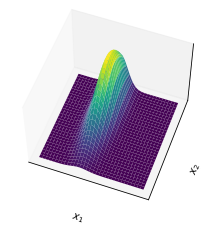

In [15]:
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([-1.25, 3.])
Sigma = np.array([[ 1.125 , 0.5], [0.5,  16.25]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

# plt.savefig("transformed_gaussian.pdf", bbox_inches='tight')